C:\Users\kunda
First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values in Dataset:
CustomerID            0
Genre          

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

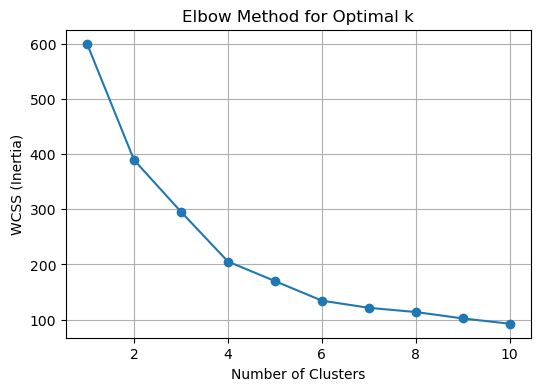

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



First 5 rows with cluster labels :
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        2
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        2


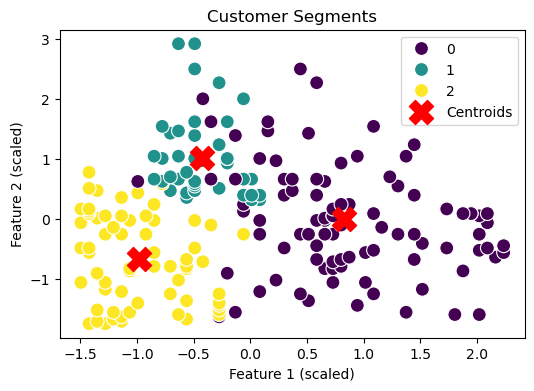

In [6]:
# Importing Necessary Libraries
import pandas as pd
import os
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset 
df = pd.read_csv("customer_data.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic Information about the dataset
print("\nDataset Information")
df.info()

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


# Selecting correct column names
features = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first 5 rows of the standardized data
print("\nFirst 5 rows of Scaled Features:")
print(scaled_features[:5])

# Elbow Method to Find Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Step 6: Plot the Elbow Graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


# Perform K-Means clustering with the optimal k (from the elbow method , assume k = 3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,random_state = 42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add Cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels :")
print(df.head())


# Visualize clusters using first two scaled features
plt.figure(figsize=(6, 4))

# Plot data points colored by cluster
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', label='Centroids', marker='X')

# Plot labels and legend
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
